# 한글 자연어 처리 기초

In [9]:
from konlpy.tag import Kkma
kkma = Kkma()

### 꼬꼬마 모듈을 사용하여 문장(sentences) 분석을 한다.

In [11]:
kkma.sentences('한국어 분석을 시작 합니다 파이썬이 재미있다')

['한국어 분석을 시작 합니다', '파이 썬 이 재미있다']

마침표(.)가 없어도 두개의 문장으로 구분한다.

명사(nouns) 분석을 한다.

In [12]:
kkma.nouns('한국어 분석을 시작 합니다 파이썬이 재미있다')

['한국어', '분석', '시작', '파이']

형태소(pos) 분석을 한다.

In [13]:
kkma.pos('한국어 분석을 시작 합니다 파이썬이 재미있다')

[('한국어', 'NNG'),
 ('분석', 'NNG'),
 ('을', 'JKO'),
 ('시작', 'NNG'),
 ('하', 'VV'),
 ('ㅂ니다', 'EFN'),
 ('파이', 'NNG'),
 ('썰', 'VV'),
 ('ㄴ', 'ETD'),
 ('이', 'MDT'),
 ('재미있', 'VA'),
 ('다', 'EFN')]

한글은 영어와 달리 단어의 형태 변화가 많아서 영어처럼 쉽게 접근하기 어렵다. 그래서 최소한의 의미 단어인 형태소로 언어를 분석하는 것이 일반적이다.

### 한나눔(Hannanum)을 사용한다.

In [16]:
from konlpy.tag import Hannanum
hannanum = Hannanum()

In [17]:
kkma.nouns('한국어 분석을 시작 합니다 파이썬이 재미있다')

['한국어', '분석', '시작', '파이']

한나눔 명사 분석은 꼬꼬마와 약간 다르다.

In [18]:
hannanum.morphs('한국어 분석을 시작 합니다 파이썬이 재미있다')

['한국어', '분석', '을', '시작', '하', 'ㅂ니다', '파이썬', '이', '재미있', '다']

한나눔의 형태소 분석을 한다.

In [148]:
hannanum.pos('한국어 분석을 시작 합니다 파이썬이 재미있다')

[('한국어', 'N'),
 ('분석', 'N'),
 ('을', 'J'),
 ('시작', 'N'),
 ('하', 'P'),
 ('ㅂ니다', 'E'),
 ('파이썬', 'N'),
 ('이', 'J'),
 ('재미있', 'P'),
 ('다', 'E')]

### 워드 클라우드

워드 클라우드(word clould)는 자주 나타나는 단어를 크게 보여줌으로써 직관적으로 텍스트를 알리는데 유용하다. 파이썬에서 사용할 수 있는 워드 클라우드도 몇 가지 있지만 여기서는 그 중에 하나를 사용한다.

In [21]:
from wordcloud import WordCloud, STOPWORDS

import numpy as np
from PIL import Image

이상한 나라의 엘리스 영문 버전을 샘플로 하고 이미지도 data 폴더에 저장한다.

In [22]:
text = open('data/alice.txt').read()
alice_mask = np.array(Image.open('data/alice_mask.png'))

stopwords = set(STOPWORDS)
stopwords.add("said")

엘리스 소설에는 said라는 단어가 많이 등장한다. 이 단어는 카운트에서 제거 해 준다.

In [23]:
import matplotlib.pyplot as plt
import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('알 수 없는 시스템 입니다.')
    
%matplotlib inline

엘리스 이미지를 출력한다.

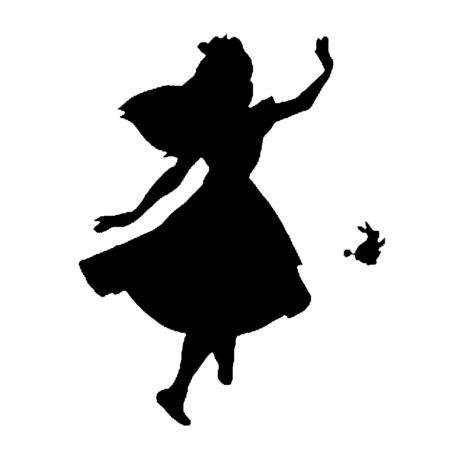

In [24]:
plt.figure(figsize=(8,8))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

문서(파일) 자체에서 단어를 카운트하는 기능을 워드 클라우드가 제공한다. 이것을 사용하여 최빈 단어를 찾는다.

In [25]:
wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask,
              stopwords = stopwords)
wc = wc.generate(text)
wc.words_

{'Alice': 1.0,
 'little': 0.29508196721311475,
 'one': 0.27595628415300544,
 'know': 0.2459016393442623,
 'went': 0.226775956284153,
 'thing': 0.2185792349726776,
 'time': 0.2103825136612022,
 'Queen': 0.20765027322404372,
 'see': 0.1830601092896175,
 'King': 0.17486338797814208,
 'well': 0.1721311475409836,
 'now': 0.16393442622950818,
 'head': 0.16393442622950818,
 'began': 0.15846994535519127,
 'way': 0.1557377049180328,
 'Hatter': 0.1557377049180328,
 'Mock Turtle': 0.15300546448087432,
 'say': 0.15027322404371585,
 'Gryphon': 0.15027322404371585,
 'think': 0.1448087431693989,
 'quite': 0.14207650273224043,
 'much': 0.13934426229508196,
 'first': 0.13934426229508196,
 'thought': 0.1366120218579235,
 'go': 0.1366120218579235,
 'come': 0.13114754098360656,
 'never': 0.1284153005464481,
 'voice': 0.12568306010928962,
 'looked': 0.12295081967213115,
 'got': 0.12295081967213115,
 'must': 0.12021857923497267,
 'Cat': 0.12021857923497267,
 'Mouse': 0.12021857923497267,
 'Duchess': 0.11475

Alice가 가장 많이 등장한다는 것을 알 수 있다.

위의 결과를 엘리스 이미지에 겹쳐 보이게 한다.

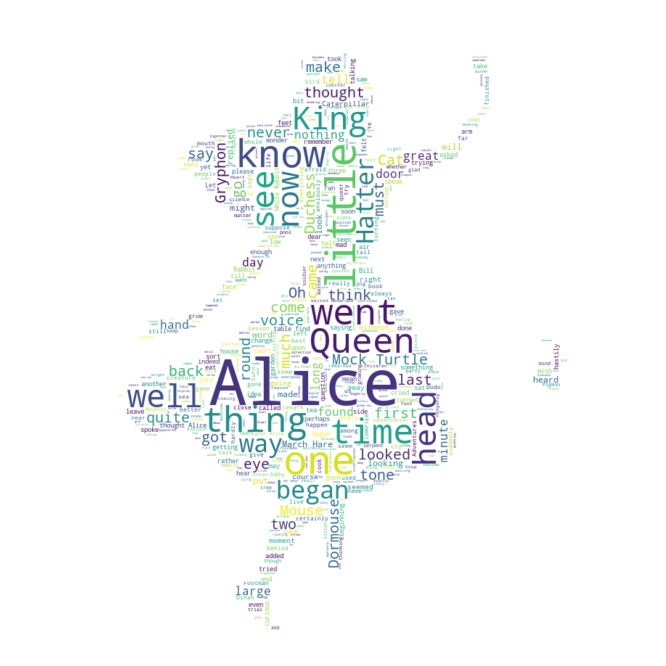

In [26]:
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

다음은 스타워즈의 A new Hope 텍스트 파일이다.  특수하게 처리할 단어(Han, Luke)를 처리한다.

In [27]:
text = open('data/a_new_hope.txt').read()

text = text.replace('HAN', 'Han')
text = text.replace("LUKE'S", 'Luke')

mask = np.array(Image.open('data/stormtrooper_mask.png'))

워드 클라우드를 준비한다.

In [28]:
stopwords = set(STOPWORDS)
stopwords.add("int")
stopwords.add("exit")

In [29]:
wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords,
              margin=10, random_state=1).generate(text)

default_colors = wc.to_array()

엘리스와 다르게 색상을 전체 회색으로 채우는 gray_color_func 함수를 만든다.

In [30]:
import random
def gray_color_func(word, font_size, position, orientation,
                   random_state=None, **kwargs):
    return 'hsl(0, 0%%, %d%%)' % random.randint(60,100)

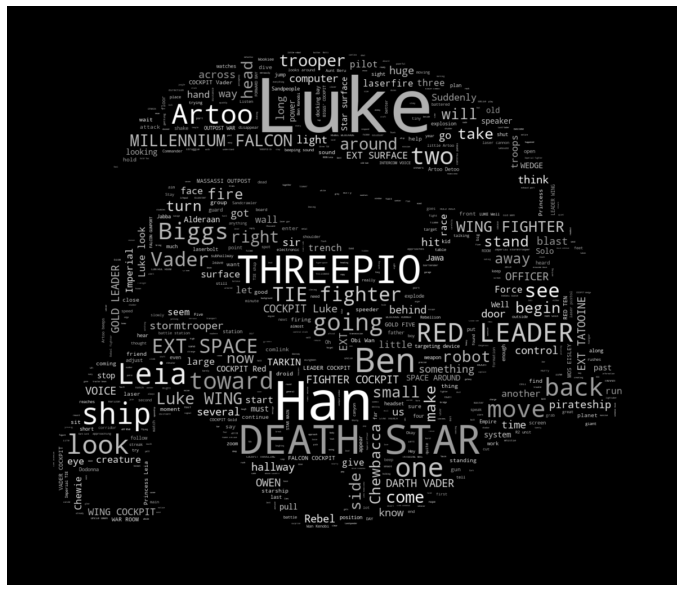

In [31]:
plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=gray_color_func, random_state=3),
          interpolation='bilinear')
plt.axis('off')
plt.show()

# 육아휴직 관련 법안에 대한 분석

육아휴직관련 법안 대한민국 국회 제 1809890호 의안인 법률문서(1809890.txt) 중 하나를 가지고 기초적인 분석을 한다.

In [33]:
import matplotlib.pyplot as plt
import nltk

from konlpy.corpus import kobill
files_ko = kobill.fileids()
doc_ko = kobill.open('1809890.txt').read()

법률문서(1809890.txt)를 읽는다. 이 법률은 공무원에 한정하고 육아휴직 대상이 되는 아이의 나이를 만 6세에서 만8세로 변경하는 내용이 들어있다.

In [35]:
doc_ko

'지방공무원법 일부개정법률안\n\n(정의화의원 대표발의 )\n\n 의 안\n 번 호\n\n9890\n\n발의연월일 : 2010.  11.  12.  \n\n발  의  자 : 정의화․이명수․김을동 \n\n이사철․여상규․안규백\n\n황영철․박영아․김정훈\n\n김학송 의원(10인)\n\n제안이유 및 주요내용\n\n  초등학교 저학년의 경우에도 부모의 따뜻한 사랑과 보살핌이 필요\n\n한 나이이나, 현재 공무원이 자녀를 양육하기 위하여 육아휴직을 할 \n\n수 있는 자녀의 나이는 만 6세 이하로 되어 있어 초등학교 저학년인 \n\n자녀를 돌보기 위해서는 해당 부모님은 일자리를 그만 두어야 하고 \n\n이는 곧 출산의욕을 저하시키는 문제로 이어질 수 있을 것임.\n\n  따라서 육아휴직이 가능한 자녀의 연령을 만 8세 이하로 개정하려\n\n는 것임(안 제63조제2항제4호).\n\n- 1 -\n\n\x0c법률  제        호\n\n지방공무원법 일부개정법률안\n\n지방공무원법 일부를 다음과 같이 개정한다.\n\n제63조제2항제4호 중 “만 6세 이하의 초등학교 취학 전 자녀를”을 “만 \n\n8세 이하(취학 중인 경우에는 초등학교 2학년 이하를 말한다)의 자녀를”\n\n로 한다.\n\n부      칙\n\n이 법은 공포한 날부터 시행한다.\n\n- 3 -\n\n\x0c신 ·구조문대비표\n\n현      행\n\n개   정   안\n\n제63조(휴직) ① (생  략)\n\n제63조(휴직) ① (현행과 같음)\n\n  ② 공무원이 다음 각 호의 어\n\n  ② -------------------------\n\n느 하나에 해당하는 사유로 휴\n\n----------------------------\n\n직을 원하면 임용권자는 휴직\n\n----------------------------\n\n을 명할 수 있다. 다만, 제4호\n\n-------------.---------------\n\n의 경우에는 대통령령으로 정\n\n---------------------------

한글 자연어 처리기 Okt 분석기로 명사 분석을 한다.

In [39]:
from konlpy.tag import Okt, Twitter
t = Twitter()
tokens_ko = t.nouns(doc_ko)
tokens_ko

['지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '정의화',
 '의원',
 '대표',
 '발의',
 '의',
 '안',
 '번',
 '호',
 '발의',
 '연월일',
 '발',
 '의',
 '자',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '위',
 '육아휴직',
 '수',
 '자녀',
 '나이',
 '만',
 '세',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '위',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '수',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '만',
 '세',
 '이하',
 '개정',
 '것임',
 '안',
 '제',
 '항제',
 '호',
 '법률',
 '제',
 '호',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '제',
 '항제',
 '호',
 '중',
 '만',
 '세',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '만',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '말',
 '의',
 '자녀',
 '로',
 '부',
 '칙',
 '이',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '안',
 '제',
 '휴직',
 '생',
 '략',
 '제',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',
 '호의',
 '느',
 '

In [40]:
ko = nltk.Text(tokens_ko, name='대한민국 국회 의안 제 1809890 호')

수집된 단어의 횟수(len(ko.tokens))와 고유한 횟수(len(set(ko.tokens)))를 확인한다.

In [41]:
print(len(ko.tokens)) # 토큰 수를 반환(문서 길이)
print(len(set(ko.tokens))) # 고유 토큰(unique tokens) 수를 반환
ko.vocab() #주파수 분포(frequency distribution)를 반환

735
250


FreqDist({'육아휴직': 38, '발생': 19, '만': 18, '이하': 18, '비용': 17, '액': 17, '경우': 16, '세': 16, '자녀': 14, '고용': 14, ...})

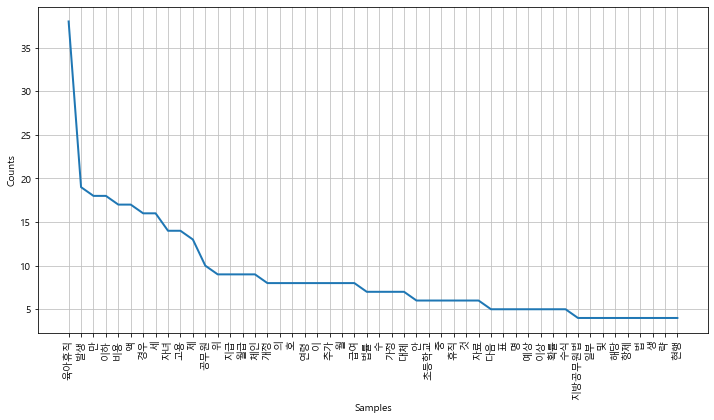

In [42]:
plt.figure(figsize=(12,6))
ko.plot(50)
plt.show()

많이 등장한 순으로 plot 된다. '육아휴직'이라는 단어가 많이 등장한다. 그런데 의미 없는 단어도 보인다. 한글은 영어와 달리 stopword를 지정하기 쉽지 않다.

그래서 case-by-case로 지정한다.

In [43]:
stop_words = ['.', '(', ')', ',', "'", '%', '-', 'X', ').', 'x','의','자','에','안','번',
              '호','을','이','다','만','로','가','를']
ko = [each_word for each_word in ko if each_word not in stop_words]
ko

['지방공무원법',
 '일부',
 '개정',
 '법률',
 '정의화',
 '의원',
 '대표',
 '발의',
 '발의',
 '연월일',
 '발',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '위',
 '육아휴직',
 '수',
 '자녀',
 '나이',
 '세',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '위',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '수',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '세',
 '이하',
 '개정',
 '것임',
 '제',
 '항제',
 '법률',
 '제',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '제',
 '항제',
 '중',
 '세',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '말',
 '자녀',
 '부',
 '칙',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '제',
 '휴직',
 '생',
 '략',
 '제',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',
 '호의',
 '느',
 '하나',
 '해당',
 '사유',
 '직',
 '임용',
 '휴직',
 '명',
 '수',
 '다만',
 '제',
 '경우',
 '대통령령',
 '정',
 '사정',
 '직',
 '명',
 '생',
 '략',
 '현

다시 출력한다.

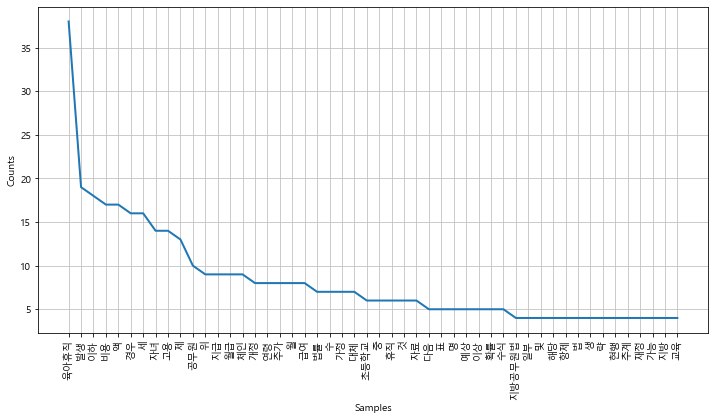

In [44]:
ko = nltk.Text(ko, name='대한민국 국회 의안 제 1809890 호')

plt.figure(figsize=(12,6))
ko.plot(50) # Plot sorted frequency of top 50 tokens
plt.show()

stop_words 변수에 의미 없는 단어를 추가하면 된다.

어떤 단어가 문서 내에서 몇 번 언급되었는지 확인 할 수 있다.

In [45]:
ko.count('초등학교')

6

원하는 단어의 문서 내 위치를 개략적으로 그 분량과 함께 알 수 있다.

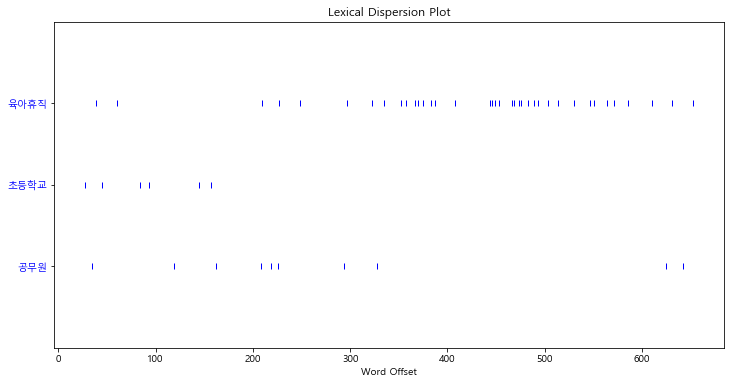

In [46]:
plt.figure(figsize=(12,6))
ko.dispersion_plot(['육아휴직', '초등학교', '공무원'])

원하는 단어의 주변부 단어까지 같이 확인할 수 있다. 또 문서 내에서 어떤 단어들이 연어(collocation : 함께 쓰인 단어)로 사용되었는지 알 수 있다.

In [47]:
ko.concordance('초등학교')

Displaying 6 of 6 matches:
 안규백 황영철 박영아 김정훈 김학송 의원 인 제안 이유 및 내용 초등학교 저학년 경우 부모 사랑 필요 나이 현재 공무원 자녀 양육 위 육아
 나이 현재 공무원 자녀 양육 위 육아휴직 수 자녀 나이 세 이하 초등학교 저학년 자녀 위 해당 부모님 일자리 곧 출산 의욕 저하 문제 수 
일부 개정 법률 지방공무원법 일부 다음 개정 제 항제 중 세 이하 초등학교 취학 전 자녀 세 이하 취학 중인 경우 초등학교 학년 이하 말 자
항제 중 세 이하 초등학교 취학 전 자녀 세 이하 취학 중인 경우 초등학교 학년 이하 말 자녀 부 칙 법 공포 날 시행 신 구조 문대비 표 
 수 다만 제 경우 대통령령 정 사정 직 명 생 략 현행 세 이하 초등학교 취 세 이하 취학 중인 경우 학 전 자녀 양육 위 초등학교 학년 
 이하 초등학교 취 세 이하 취학 중인 경우 학 전 자녀 양육 위 초등학교 학년 이하 여 여자 공무원 말 자녀 임신 출산 때 생 략 생 략 


워드 클라우드를 적용한다.

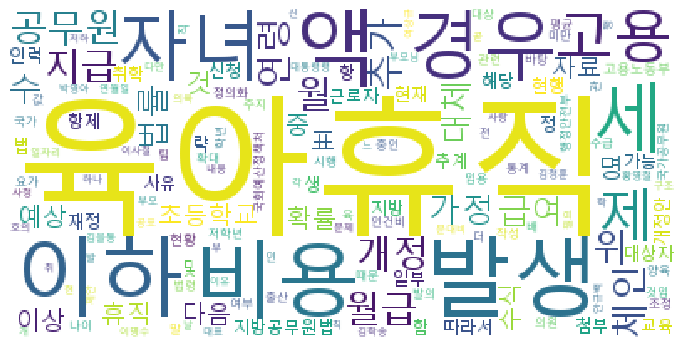

In [48]:
from wordcloud import WordCloud, STOPWORDS

data = ko.vocab().most_common(150)

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                     relative_scaling = 0.2,
                     background_color='white',
                     ).generate_from_frequencies(dict(data))
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# 네이버 검색 결과를 이용한 학습

네이버의 지식인에서 여자 친구 선물이라는 주제로 검색을 하고 그 검색 결과를 분석 해 본다. 검색 후 크롬 개발자 도구로 질문에 대한 답변이 위치한 곳의 태그를  찾는다.

In [49]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt

%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('알 수 없는 시스템 입니다.')
    
plt.rcParams['axes.unicode_minus'] = False

In [50]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import urllib
import time

웹 브라우저 화면의 주소 창에 있는 주소 부분을 약간 수정해서 접근해야 할 주소를 정한다.

In [77]:
tmp1 = 'https://search.naver.com/search.naver?where=kin'
html = tmp1 + '&sm=tab_jum&ie=utf8&query={key_word}&kin_start={num}'

response = urlopen(html.format(num=1, key_word=urllib.parse.quote('여친 선물')))

soup = BeautifulSoup(response, "html.parser")

tmp = soup.find_all('dl')

테스트로 한 페이지만 테스트 결과를 확인한다.

In [85]:
tmp_list = []
for line in tmp:
    tmp_list.append(line.text)
    
tmp_list

[' 기본검색   입력한 단어가 하나이상 포함된 문서 검색  ',
 ' 상세검색  정확히 일치하는 단어/문장(" ") 반드시 포함하는 단어(+) 제외하는 단어(-)  기본검색의 결과 범위를 줄이고자 할 때 사용합니다.여러개의 단어를 입력하실 때는쉼표(,)로 구분해서 입력하세요.   ',
 '  질문  여자친구 선물추천 실용적인거요!   2019.09.06.   여자친구 선물추천 실용적인 거로 부탁드립니다. 꽃 이런 건 보니까 별로 안 좋아하더라구요. 진짜 쓸 수 있는 실용적이지만 하기 괜찮은 여자친구 선물추천 부탁합니다.   답변 젊은 20대 연령층이시라고 하신다면 에코백 같은거 어떠세요? 요즘 감성에코백이 유행이고 에코백덕후들도 많아서요 여자친구에게 선물하기 좋은...    닉네임phi1****   ',
 '  질문  여자친구 선물 안줄수있는법 알려주세요   2018.05.30.   여자친구 선물 안줄수있는법 알려주세요 ㅠㅠㅠㅠ아 곧 다가오는 엄마 생일 챙겨드리려고 돈모았는데 갑자기 여자친구가 지갑 사달라고 합니다 근데 너무 비쌉니다 그동안...   답변 사실대로얘기해요 엄마생신챙겨야한다고 지갑안사준다그 헤어지자면 보내셍 ㅆㄴ임    닉네임용아우리언제봐   ',
 '  질문  임용준비 여자친구 선물   2016.04.19.   현재 여자친구가 임용준비를 하고있어요. 편지랑 같이 줄 간단한 선물을 준비하고싶은데 뭘해야할지 모르겠어요 제가 대학생신분이고 아르바이트도 하지않기때문에 금액이...   답변 임용준비 여자친구 선물을 고민중이시군요. 선물은 비싼것보다는 맘이죠. 의미있고 유니크한 특별한 선물이 좋을꺼 같네요. 드림캐쳐 같은 선물은 어떨까요? 드림캐쳐는...    닉네임짱구는못말려   ',
 '  질문  여자친구 선물 추천좀요   2020.05.26.   여자친구가 고2인데 뭐로 생일선물을 줘야 좋아할까요???   답변 학생이니까 시계나 지갑이 제일 무난할것같아요.    닉네임pony****   ',
 '  질문  여자친구 선물   2016.04.11.  

대략 1만개 정도의 검색 결과를 읽어오도록 한다. 전체 실행 시간은 몇 분 이상 소요된다. 웹 페이지에 직접 접근하니 time.sleep(0.5)를 걸어서 증가한 부분(0.5초 대기함)도 있고 웹 페이즈를 읽느라 소모된 시간도 있다.(검색 시기에 따라 결과는 다르다.)

In [86]:
from tqdm.notebook import tqdm

present_candi_text = []

for n in tqdm(range(1, 1000, 10)):
    response = urlopen(html.format(num=n, key_word=urllib.parse.quote('여자 친구 선물')))
    
    soup = BeautifulSoup(response, "html.parser")
    tmp = soup.find_all('dl')
    
    for line in tmp:
        present_candi_text.append(line.text)
        
    time.sleep(0.5)


저장된 문장을 확인한다.

In [93]:
present_candi_text

[' 기본검색   입력한 단어가 하나이상 포함된 문서 검색  ',
 ' 상세검색  정확히 일치하는 단어/문장(" ") 반드시 포함하는 단어(+) 제외하는 단어(-)  기본검색의 결과 범위를 줄이고자 할 때 사용합니다.여러개의 단어를 입력하실 때는쉼표(,)로 구분해서 입력하세요.   ',
 '  질문  여자친구선물추천 해주세요!급해요   2020.07.09.   같아서 여자친구선물 따로 알아보고 있거든요 어떤걸... 같은데 여자친구선물추천 부탁드려요 무선 이어폰 갖고... 비싼건 부담이구요 ㅜ 여자친구선물로 괜찮을거 없을까요?   답변 여자친구선물 고르는거 정말 어렵죠..ㅎㅎ 항상... 샀는데 여자친구선물로 딱일 거 같아서 알려드리고 가요... ㅎㅎ 여자친구선물로 좋을 거 같아 추천해요! 직접...    닉네임w2wi****   ',
 '  질문  여자친구선물 경락마사지 끊어주면 좋아할까요?   2020.08.31.   안녕하세요 기념일이라 여자친구선물로 좋아하는 거... 관리권으로 여자친구선물 해줄까 하는데 어떤가요?... aid=1570849234646858348 여자친구선물로 에스테틱 관리권...   답변 여자친구선물 경락마사지 끊어주면 엄청 좋아하실겁니다. 젊은분들이나 나이드신 분들도 꾸준히 경락 받고 있으니 여자친구선물 경락마사지...    닉네임식단 김선생   ',
 '  질문  여자친구선물 감동 줄 수 있는 걸로 추천해 주세요   2020.08.05.   여자친구선물로 감동 줄 수 있을 만한 것들에 뭐가... 본인 돈으로 안 끊을 거 잘 아니까 여자친구선물로 관리권... 요즘 인기 많은 것도 좋으니 여자친구선물 추천 부탁드려요!   답변 여자친구선물로 경락 관리권 정말 신선하네요~ 여자친구선물이나 아내선물로 남편, 남자친구들이 관리권 많이... 있어요 여자친구선물로 관리권 주신다면 여자친구분께서...    닉네임랑랑피트니스   ',
 '  질문  여자친구 선물로 감동적인게 뭐가 있을까요?   2020.04.07.   나중에 헤어진다고 해도 평생 저를

In [94]:
len(present_candi_text)

1300

사용할  도구 import 하고 present_text 변수에 저장

In [95]:
import nltk
from konlpy.tag import Okt; t = Twitter()

present_text = ''

for each_line in present_candi_text[:10000]:
    present_text = present_text + each_line + '\n'

1 만개가 되는 문장에서 형태소 분석을 마친 단어를 가지고 token 을 모은다.

In [96]:
tokens_ko = t.morphs(present_text)
tokens_ko

['기본',
 '검색',
 '입력',
 '한',
 '단어',
 '가',
 '하나',
 '이상',
 '포함',
 '된',
 '문서',
 '검색',
 '상세',
 '검색',
 '정확히',
 '일치',
 '하는',
 '단어',
 '/',
 '문장',
 '("',
 '")',
 '반드시',
 '포함',
 '하는',
 '단어',
 '(+)',
 '제외',
 '하는',
 '단어',
 '(-)',
 '기',
 '본',
 '검색',
 '의',
 '결과',
 '범위',
 '를',
 '줄이고자',
 '할',
 '때',
 '사용',
 '합니다',
 '.',
 '여러',
 '개',
 '의',
 '단어',
 '를',
 '입력',
 '하실',
 '때',
 '는',
 '쉼표',
 '(,)',
 '로',
 '구분',
 '해서',
 '입력',
 '하세요',
 '.',
 '질문',
 '여자친구',
 '선물',
 '추천',
 '해주세요',
 '!',
 '급해요',
 '2020.07',
 '.',
 '09',
 '.',
 '같아서',
 '여자친구',
 '선물',
 '따로',
 '알아보고',
 '있거든요',
 '어떤',
 '걸',
 '...',
 '같은데',
 '여자친구',
 '선물',
 '추천',
 '부탁드려요',
 '무선',
 '이어폰',
 '갖고',
 '...',
 '비싼건',
 '부담',
 '이구',
 '요',
 'ㅜ',
 '여자친구',
 '선물',
 '로',
 '괜찮을거',
 '없을까요',
 '?',
 '답변',
 '여자친구',
 '선물',
 '고르는거',
 '정말',
 '어렵죠',
 '..',
 'ㅎㅎ',
 '항상',
 '...',
 '샀는데',
 '여자친구',
 '선물',
 '로',
 '딱일',
 '거',
 '같아서',
 '알려',
 '드리고',
 '가요',
 '...',
 'ㅎㅎ',
 '여자친구',
 '선물',
 '로',
 '좋을',
 '거',
 '같아',
 '추천',
 '해요',
 '!',
 '직접',
 '...',
 '닉네임',
 'w',
 '2',
 'wi',
 '****',


토큰으로 모은 단어는 86300 개 이지만 중복된 단어를 빼주면 419개이다.

In [97]:
ko = nltk.Text(tokens_ko, name='여자 친구 선물')
print(len(ko.tokens))
print(len(set(ko.tokens)))

81109
7639


그 중에 많이 사용된 단어 순에서 의미 없는 단어들이 있다. 그 단어들을 제거 해 준다.

In [98]:
ko = nltk.Text(tokens_ko, name='여자 친구 선물')
ko.vocab().most_common(100)

[('선물', 3898),
 ('.', 3277),
 ('여자친구', 3228),
 ('...', 1390),
 ('이', 1135),
 ('질문', 1085),
 ('답변', 1072),
 ('가', 1022),
 ('을', 1022),
 ('닉네임', 971),
 ('로', 944),
 ('추천', 932),
 ('대', 683),
 ('에', 682),
 ('?', 664),
 ('를', 663),
 ('는', 582),
 ('요', 557),
 ('****', 522),
 ('도', 518),
 (',', 515),
 ('단어', 500),
 ('여자', 499),
 ('20', 444),
 ('은', 434),
 ('검색', 417),
 ('하는', 392),
 ('의', 373),
 ('제', 363),
 ('좀', 357),
 ('때', 346),
 ('한', 345),
 ('생일', 333),
 ('..', 309),
 ('입력', 300),
 ('저', 299),
 ('뭐', 286),
 ('목걸이', 283),
 ('입니다', 261),
 ('!', 260),
 ('안녕하세요', 260),
 ('합니다', 258),
 ('30', 248),
 ('~', 238),
 ('들', 234),
 ('으로', 232),
 ('것', 232),
 ('포함', 210),
 ('1', 209),
 ('인데', 209),
 ('거', 204),
 ('하나', 202),
 ('화장품', 202),
 ('연관검색어', 200),
 ('중', 197),
 ('좋을까요', 196),
 ('향수', 193),
 ('하는데', 191),
 ('하고', 190),
 ('해서', 188),
 ('고민', 188),
 ('할', 187),
 ('해주세요', 186),
 ('생각', 182),
 ('너무', 181),
 ('어떤', 175),
 ('나', 175),
 ('분', 173),
 ('고', 168),
 ('좋은', 167),
 ('주', 161),
 ('에서', 1

In [154]:
stop_words = ['.', '로', '...', '를', '질문', '답변', '을', '닉네임', 
               '가', '거', '****', '권', '대', '의', '요', '?', '으로', '들', '수',
              '에', '이', '검색', '도', '~', ',', '은', '좀', '인지',
              '에서', '입력', '한', '하는', '합니다', '는', '!', '어떤',
              '부탁드려요', '2', '하는데', '분', '것', '저', '게', '제', 'ysl',
               '해서', '해주세요', '같아서', '걸', '..', 'ㅎㅎ', '가요',
               '안녕하세요', '이라', '이나', '줄', '만', '뭐', '잘', '해주려고',
               '고', '입니다', '같아요', '!!', '&', '된', '주', '때', '1', '인데', '연관검색어',
              '중', '할', '나', '(', '랑', '적', '개', '사용', '하세요', '곧', '후', '해', '기',
              '/', '??', ')', '뭘', '이상', '좋을까요', '하고', '많이', '있는', '다', '면', 'ㅠㅠ', '(+)', '정도'
              ]

tokens_ko = [each_word for each_word in tokens_ko if each_word not in stop_words]

ko = nltk.Text(tokens_ko, name='여자 친구 선물')
ko.vocab().most_common(50)

[('선물', 3898),
 ('여자친구', 3228),
 ('추천', 932),
 ('단어', 500),
 ('여자', 499),
 ('20', 444),
 ('생일', 333),
 ('목걸이', 283),
 ('30', 248),
 ('포함', 210),
 ('하나', 202),
 ('화장품', 202),
 ('향수', 193),
 ('고민', 188),
 ('생각', 182),
 ('가격', 149),
 ('에센스', 123),
 ('뷰티', 114),
 ('스킨', 112),
 ('크리스마스', 108),
 ('기본', 105),
 ('운동', 105),
 ('제외', 104),
 ('친구', 104),
 ('이번', 104),
 ('결과', 103),
 ('구분', 101),
 ('디바이스', 101),
 ('문서', 100),
 ('상세', 100),
 ('일치', 100),
 ('문장', 100),
 ('범위', 100),
 ('쉼표', 100),
 ('도움말', 100),
 ('케어', 100),
 ('스킨로션', 100),
 ('근력', 100),
 ('유지', 100),
 ('보시겠습니까', 100),
 ('열기', 100),
 ('가방', 98),
 ('브랜드', 96),
 ('편지', 96),
 ('지갑', 95),
 ('10', 93),
 ('커플', 93),
 ('한테', 87),
 ('귀걸이', 85),
 ('악세사리', 84)]

In [151]:
filter_tokens = []
# 의미없는 단어를 걸러줍니다. (hannanum 이용) + 단어의 길이가 1글자인거 제외
for i in tokens_ko:
    if hannanum.pos(i)[0][1] == 'N' and len(hannanum.pos(i)[0][0]) >= 2:
#       print(hannanum.pos(i)[0][0])
        filter_tokens.append(i)

In [155]:
tokens_ko = [each_word for each_word in filter_tokens if each_word not in stop_words]

ko = nltk.Text(tokens_ko, name='여자 친구 선물')
ko.vocab().most_common(50)

[('선물', 3898),
 ('여자친구', 3228),
 ('추천', 932),
 ('단어', 500),
 ('여자', 499),
 ('20', 444),
 ('생일', 333),
 ('목걸이', 283),
 ('30', 248),
 ('포함', 210),
 ('하나', 202),
 ('화장품', 202),
 ('향수', 193),
 ('고민', 188),
 ('생각', 182),
 ('가격', 149),
 ('에센스', 123),
 ('뷰티', 114),
 ('스킨', 112),
 ('크리스마스', 108),
 ('기본', 105),
 ('운동', 105),
 ('제외', 104),
 ('친구', 104),
 ('이번', 104),
 ('결과', 103),
 ('구분', 101),
 ('디바이스', 101),
 ('문서', 100),
 ('상세', 100),
 ('일치', 100),
 ('문장', 100),
 ('범위', 100),
 ('쉼표', 100),
 ('도움말', 100),
 ('케어', 100),
 ('스킨로션', 100),
 ('근력', 100),
 ('유지', 100),
 ('보시겠습니까', 100),
 ('열기', 100),
 ('가방', 98),
 ('브랜드', 96),
 ('편지', 96),
 ('지갑', 95),
 ('10', 93),
 ('커플', 93),
 ('한테', 87),
 ('귀걸이', 85),
 ('악세사리', 84)]

등장 빈도에 따른 빈도수를 그래프로 그린다.

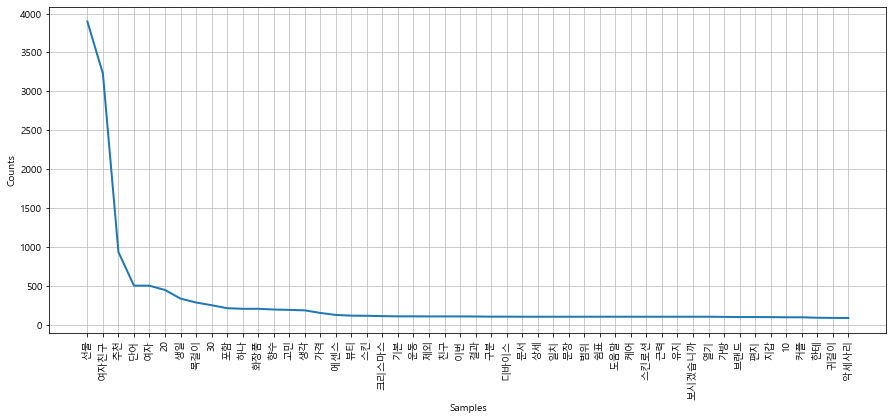

In [156]:
plt.figure(figsize=(15,6))
ko.plot(50)
plt.show()

워드 클라우드

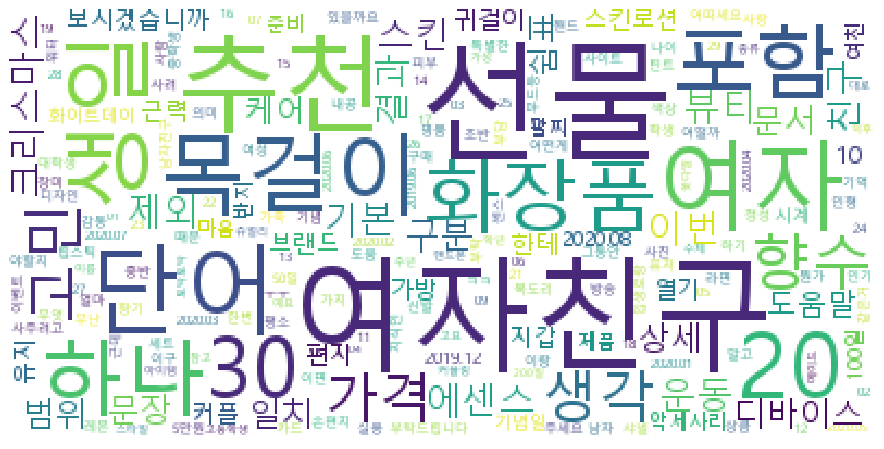

In [157]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

data = ko.vocab().most_common(300)
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                     relative_scaling = 0.2,
                     #stopwords=STOPWORDS,
                     background_color='white',
                     ).generate_from_frequencies(dict(data))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

하트 이미지로 마스킹해서 그려본다.

In [158]:
mask = np.array(Image.open('data/heart.jpg'))

from wordcloud import ImageColorGenerator

image_colors = ImageColorGenerator(mask)

In [159]:
data = ko.vocab().most_common(200)

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                     relative_scaling = 0.1, mask=mask,
                     background_color = 'white',
                     min_font_size=1,
                     max_font_size=100).generate_from_frequencies(dict(data))

default_colors = wordcloud.to_array()

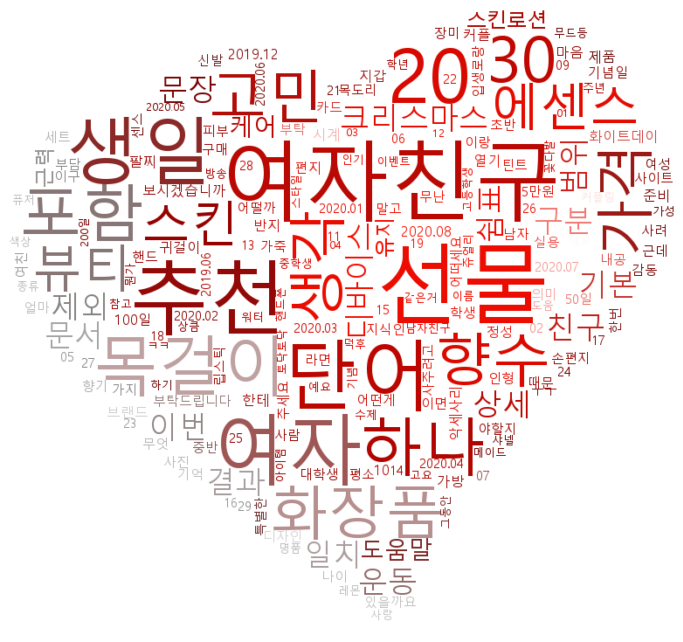

In [160]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()